In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as st
from statsmodels.tsa.arima_model import ARMA
import statsmodels.graphics.tsaplots as stsa

In [14]:
%matplotlib inline

In [43]:
sns.set_context('talk')
sns.set_style('white')

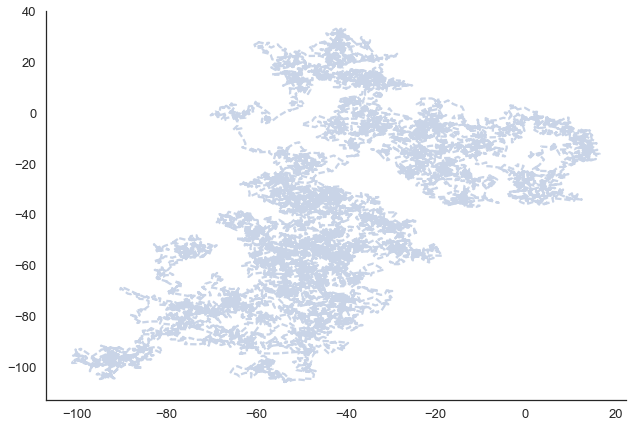

In [131]:
data = np.random.randn(10000,2)
plt.plot(np.cumsum(data[:,0]), np.cumsum(data[:,1]), '--', alpha=0.3)
sns.despine()

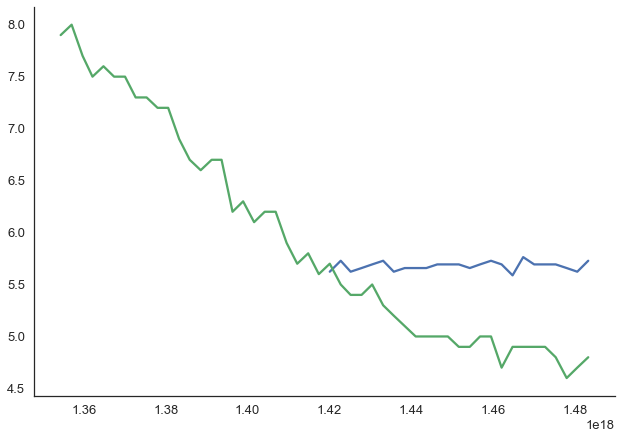

In [209]:
st_date = pd.Timestamp('2015-01-01')
ed_date = pd.Timestamp('2017-01-01')

unrate = pd.read_csv('../data/UNRATE.csv', index_col=0)
unrate.index = pd.to_datetime(unrate.index)

model = ARMA(unrate.diff()[-100:], (1,0), freq='MS')
results = model.fit()

unrate['FORECAST'] = results.predict(start=st_date, end=ed_date, dynamic=False)

plt.plot(pd.date_range(st_date, ed_date, freq='MS'), unrate['UNRATE'][st_date] + unrate['FORECAST'].dropna())
plt.plot(unrate.index[-50:], unrate['UNRATE'][-50:])
sns.despine()

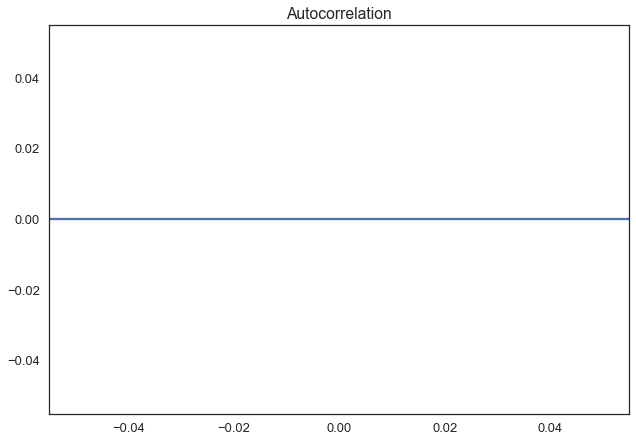

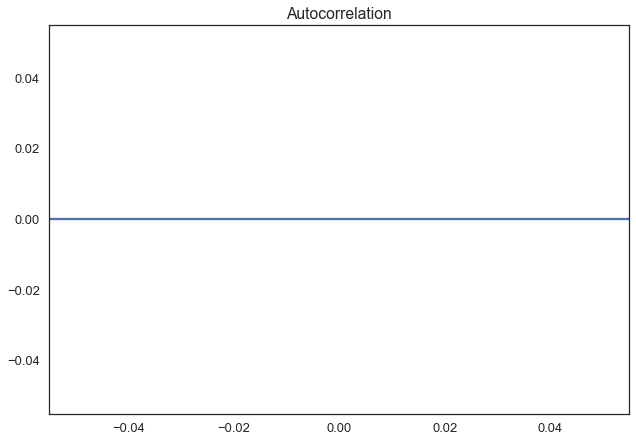

In [206]:
stsa.plot_acf(unrate['UNRATE'].diff())

In [210]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 UNRATE   No. Observations:                  100
Model:                     ARMA(1, 0)   Log Likelihood                  29.602
Method:                       css-mle   S.D. of innovations              0.180
Date:                Thu, 02 Mar 2017   AIC                            -53.203
Time:                        01:16:37   BIC                            -45.388
Sample:                    10-01-2008   HQIC                           -50.040
                         - 01-01-2017                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0102      0.028     -0.369      0.713      -0.064       0.044
ar.L1.UNRATE     0.3509      0.096      3.668      0.000       0.163       0.538
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.8501           +0.0000j            2.8501            0.0000
-----------------------------------------------------------------------------
"""